Please find below link to dataset used

Ontario consumer price index
Ministry: Agriculture, Food and Rural Affairs 

https://data.ontario.ca/dataset/29a55543-3e27-4d7a-8ce5-7b669305b2d8/resource/cfeca07a-7752-4e54-b109-fe20467413a2/download/cpi.xlsx

The Consumer Price Index measures changes in the cost of selected food items over time like: food purchased from stores fresh or frozen beef fresh or frozen pork fresh or frozen chicken... 

In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import os

file_path = 'C:/Users/parul/visualization/02_activities/assignments/cpi.xlsx'
df = pd.read_excel(file_path)  
print(df.head())


  The Consumer Price Index (CPI), 2009 basket, annually (2002=100 unless specified) ( 1979 -2023) , Ontario  \
0                                                NaN                                                          
1                                                NaN                                                          
2                                      All-items CPI                                                          
3                                             Food *                                                          
4                         Food purchased from stores                                                          

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1       1979       1980       1981       1982       1983       1984   
2         39         43       48.2       53.3       56.6       59.4   
3       43.8       48.5       53.9       57.8    

In [3]:
# Load dataset
df = pd.read_excel(file_path, header=2) 

# Show first few rows
print("Initial DataFrame:")
print(df.head())

# Set column as index
df.set_index(df.columns[0], inplace=True)

# Drop non-numeric columns
columns_to_keep = df.columns[df.columns.astype(str).str.isnumeric()]
df = df[columns_to_keep]

# Convert data to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Verify and show DF
print(df.info())
print(df.head())

Initial DataFrame:
                   Unnamed: 0  1979  1980  1981  1982  1983  1984  1985  1986  \
0               All-items CPI    39    43  48.2  53.3  56.6  59.4  61.8  64.6   
1                      Food *  43.8  48.5  53.9  57.8  60.6  64.7  66.4  69.3   
2  Food purchased from stores    47  52.4  58.4  61.8  64.2  69.2  70.4  73.5   
3        Fresh or frozen beef  51.1  55.1  56.7  56.4  57.8  63.1  63.8  65.5   
4        Fresh or frozen pork  49.8  48.6  57.7  67.3  67.7  68.7  69.5  77.8   

   1987  ...   2016   2017   2018   2019   2020   2021   2022   2023  \
0  67.8  ...  129.7  131.9    135  137.5  138.4  143.2  152.9  158.7   
1  72.3  ...  143.5  143.3  147.4  152.6  155.5  159.4  173.9  186.3   
2  76.9  ...    145  143.2  145.2    151  154.1  157.4  173.1  186.3   
3  71.6  ...  179.1  177.4  178.8  184.6  192.6  196.5  213.6  224.5   
4    86  ...  129.5  129.1  129.9  132.6  136.7  138.4    142  141.6   

  2023/2022  2018/2023 CAGR  
0  0.037933        0.032877  
1

In [4]:
print(df.columns)

Index([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='object')


                            1979  1980  1981  1982  1983  1984  1985  1986  \
Unnamed: 0                                                                   
All-items CPI               39.0  43.0  48.2  53.3  56.6  59.4  61.8  64.6   
Food *                      43.8  48.5  53.9  57.8  60.6  64.7  66.4  69.3   
Food purchased from stores  47.0  52.4  58.4  61.8  64.2  69.2  70.4  73.5   

                            1987  1988  ...   2014   2015   2016   2017  \
Unnamed: 0                              ...                               
All-items CPI               67.8  71.0  ...  125.9  127.4  129.7  131.9   
Food *                      72.3  74.3  ...  136.2  141.2  143.5  143.3   
Food purchased from stores  76.9  78.3  ...  137.6  143.2  145.0  143.2   

                             2018   2019   2020   2021   2022   2023  
Unnamed: 0                                                            
All-items CPI               135.0  137.5  138.4  143.2  152.9  158.7  
Food *              

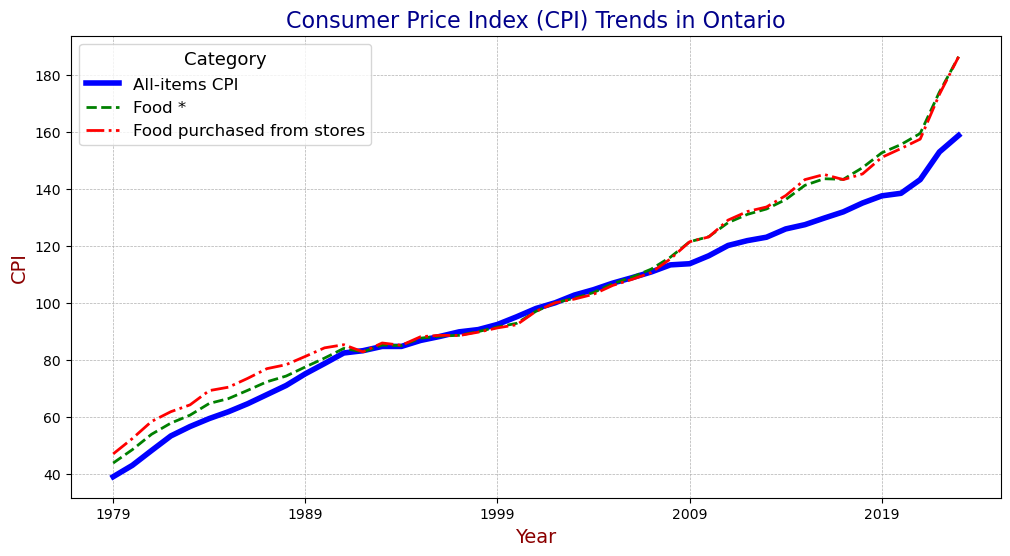

In [5]:
import matplotlib.pyplot as plt

# Plot line chart
categories = ['All-items CPI', 'Food *', 'Food purchased from stores']

# Check categories
df = df[df.index.isin(categories)]
print(df)

line_colors = ['b', 'g', 'r']  # Colors for each line
line_styles = ['-', '--', '-.']  # Line styles for each line
line_widths = [4, 2, 2]  # Line widths for each line

ax = df.T.plot(figsize=(12, 6))
for i, line in enumerate(ax.get_lines()):
    line.set_color(line_colors[i])
    line.set_linestyle(line_styles[i])
    line.set_linewidth(line_widths[i])

plt.title('Consumer Price Index (CPI) Trends in Ontario', fontsize=16, color='darkblue')
plt.xlabel('Year', fontsize=14, color='darkred')
plt.ylabel('CPI', fontsize=14, color='darkred')
plt.legend(title='Category', fontsize=12, title_fontsize='13')
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()


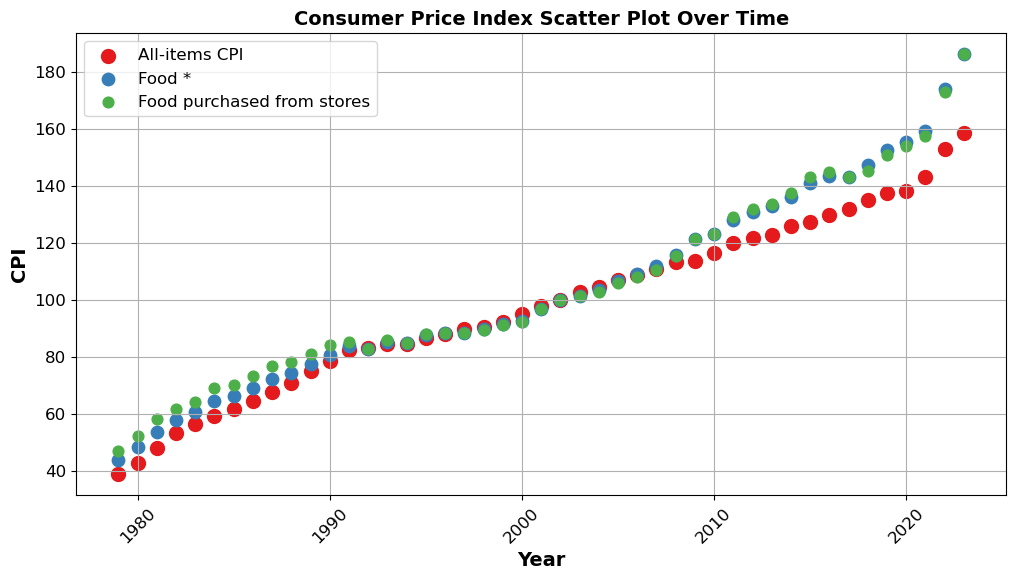

In [8]:
df.index = ['All-items CPI', 'Food *', 'Food purchased from stores']
all_rows = df

colors = ['#E41A1C', '#377EB8', '#4DAF4A']  # Red, Blue, Green
marker_sizes = [100, 80, 60]  # Sizes for each row
font_properties = {'fontsize': 14, 'fontweight': 'bold'}


plt.figure(figsize=(12, 6))

for i, (index, row) in enumerate(all_rows.iterrows()):
    plt.scatter(row.index, row.values, label=index, color=colors[i], s=marker_sizes[i])

plt.xlabel('Year', **font_properties)
plt.ylabel('CPI', **font_properties)
plt.title('Consumer Price Index Scatter Plot Over Time', **font_properties)
plt.legend(loc='upper left', fontsize=12)  # Legend in top left corner
plt.grid(True)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.show()

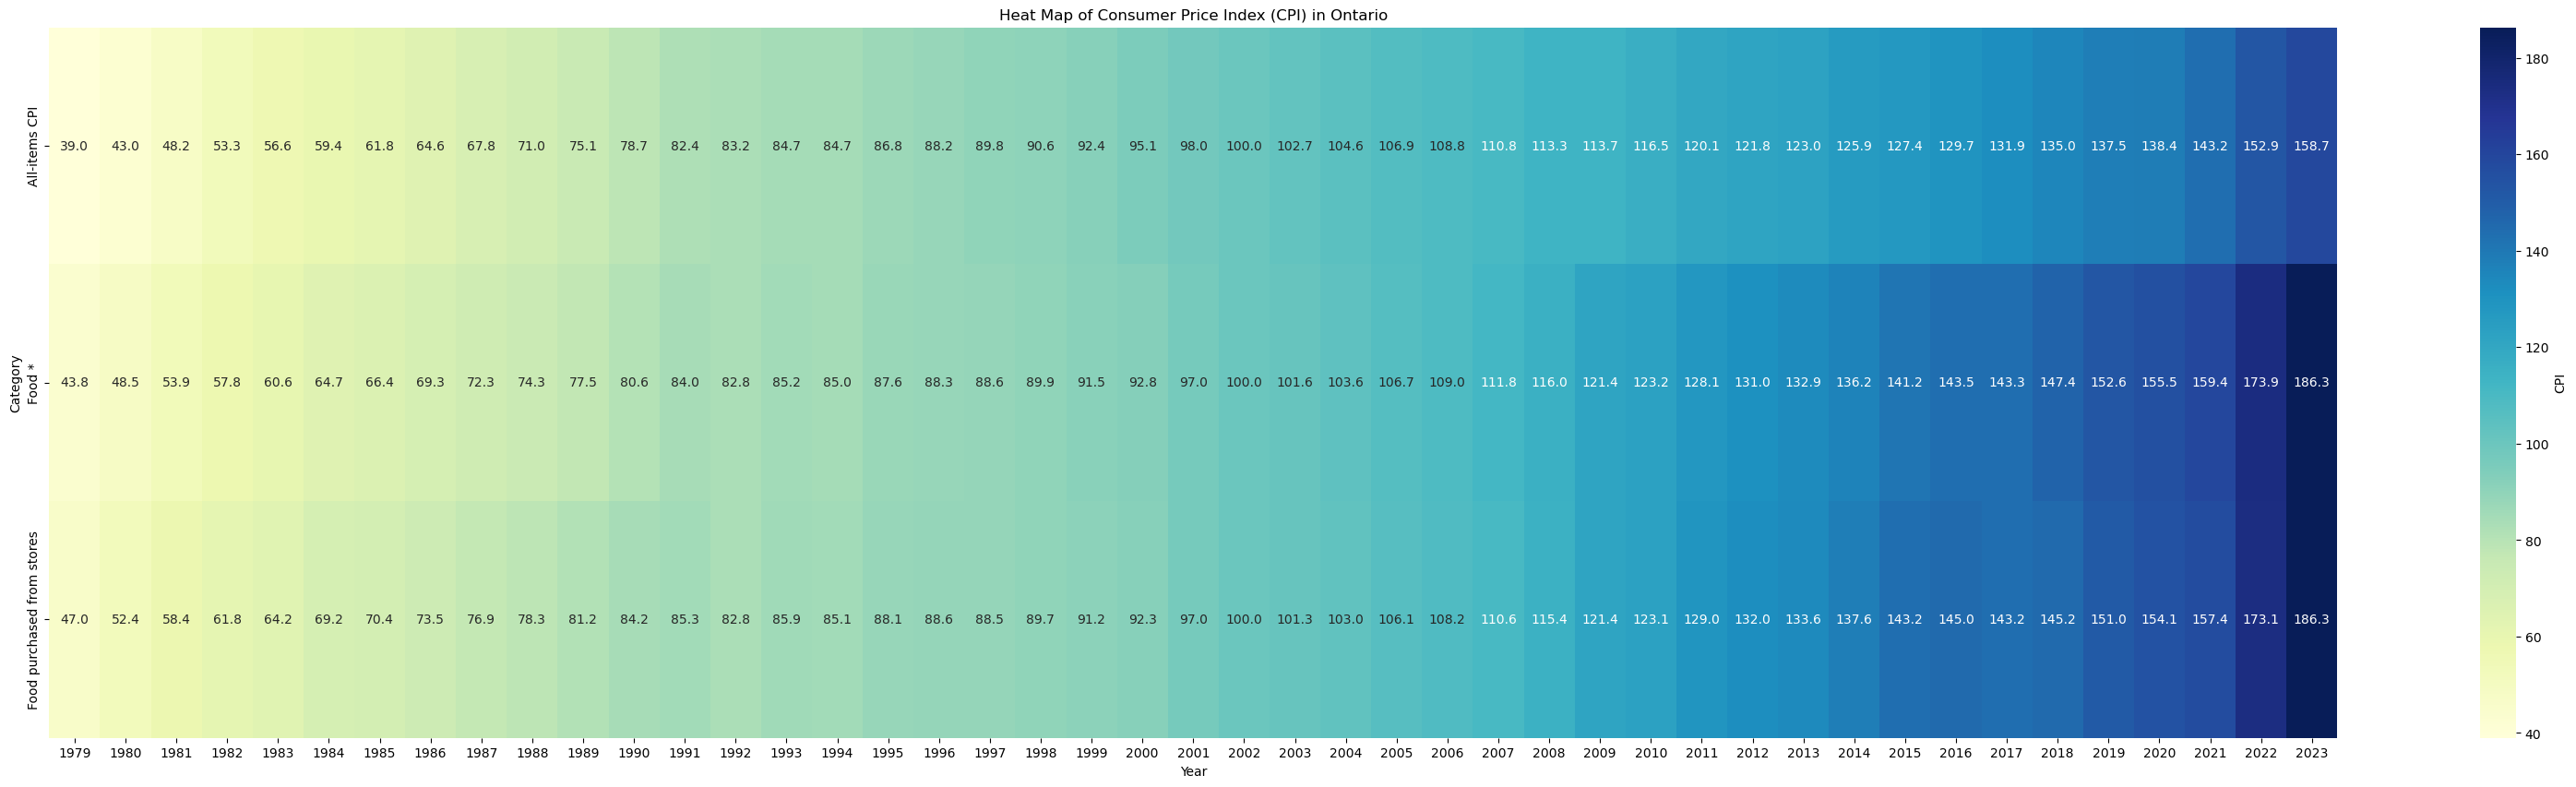

In [7]:
import seaborn as sns
import numpy as np

heatmap_data = df.loc[categories].astype(float)

plt.figure(figsize=(40, 10))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f", cbar_kws={'label': 'CPI'})

plt.title('Heat Map of Consumer Price Index (CPI) in Ontario')
plt.xlabel('Year')
plt.ylabel('Category')
plt.show()
